In [38]:
import sys
import os

parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from features.get_merged_dataframes import get_merged_dataframes

In [39]:
pair_1, pair_2 = "BTC_USDT", "DOT_USDT"

In [40]:
train_df, val_df, test_df = get_merged_dataframes(pair_1, pair_2)

start: 2020-08-18 23:00:00+00:00, end: 2025-04-09 17:54:00+00:00


KeyboardInterrupt: 

Добавим колонку target - это close_y для следующей свечи

In [ ]:
df = train_df.copy()

In [ ]:
df['target'] = df['close_y'].shift(-1) / df['close_y']

In [ ]:
df = df.iloc[:-1]

Будем обучаться на окне фиксированной длины, считать ошибку на валидации, сдвигать окно, заново учиться и считать ошибку на новой валидации и так далее

In [43]:
target = 'target'

features = df.columns.drop(['date', 'target'])

train_ratio = 0.8
N = len(df)
train_size = int(N * train_ratio)

train_data = df.iloc[0:train_size]
val_data = df.iloc[train_size:N]

train_pool = Pool(data=train_data[features], label=train_data[target])
val_pool = Pool(data=val_data[features], label=val_data[target])

model = CatBoostRegressor(iterations=100, depth=7, learning_rate=0.08, loss_function='RMSE', verbose=False)
model.fit(train_pool, eval_set=val_pool)

val_predictions = model.predict(val_data[features])
rmse = root_mean_squared_error(val_data[target], val_predictions)
catboost_rmse_scores.append(rmse)

print(f'Validation RMSE : {rmse}')

Validation RMSE : 0.0007607454252190079


In [44]:
feature_importances = model.get_feature_importance()
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
print(importance_df.head(20))

                  feature  importance
88       OSC_STOCH_K_ST_y   47.786208
5       RAW_prev_return_x   17.549898
12            MA_EMA_LT_x   13.541909
85   OSC_MACD_SIGNAL_MT_y    8.715619
75            MA_EMA_ST_y    7.129743
103          MOM_ADX_ST_y    5.276624
0                  open_x    0.000000
86          OSC_MACD_LT_y    0.000000
87   OSC_MACD_SIGNAL_LT_y    0.000000
89       OSC_STOCH_D_ST_y    0.000000
90     OSC_STOCH_RSI_ST_y    0.000000
83   OSC_MACD_SIGNAL_ST_y    0.000000
91       OSC_STOCH_K_MT_y    0.000000
92       OSC_STOCH_D_MT_y    0.000000
93     OSC_STOCH_RSI_MT_y    0.000000
94       OSC_STOCH_K_LT_y    0.000000
95       OSC_STOCH_D_LT_y    0.000000
84          OSC_MACD_MT_y    0.000000
81           OSC_RSI_LT_y    0.000000
82          OSC_MACD_ST_y    0.000000


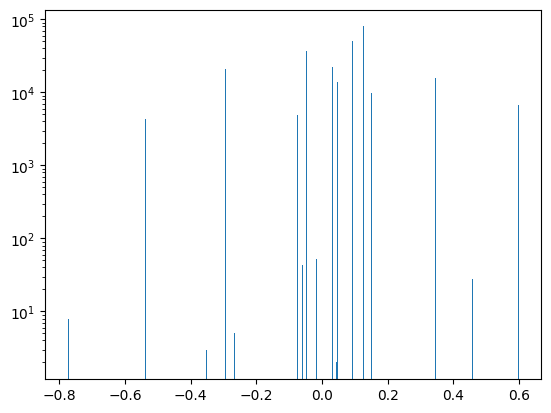

In [45]:
import matplotlib.pyplot as plt
plt.hist(10000 * (val_predictions - 1), bins=500)
plt.yscale('log')
plt.show()

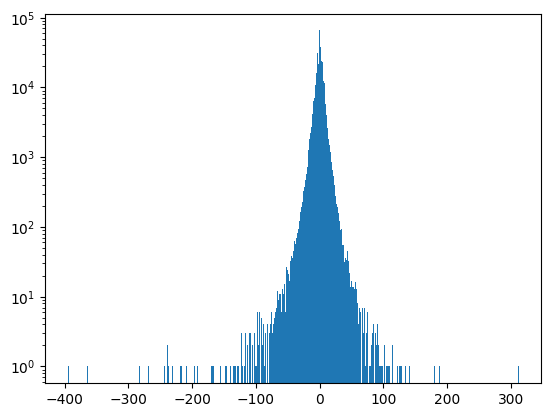

In [46]:
import matplotlib.pyplot as plt
plt.hist(10000 * (val_data[target] - 1), bins=500)
plt.yscale('log')
plt.show()

In [53]:
from catboost import CatBoostRegressor, Pool
import pandas as pd

target = 'target'
features = df.columns.drop(['date', 'target'])

train_ratio = 0.8
N = len(df)
train_size = int(N * train_ratio)

train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:]

train_pool = Pool(data=train_data[features], label=train_data[target])
val_pool = Pool(data=val_data[features], label=val_data[target])

# Initialize the CatBoost Regressor with modified parameters:
# - iterations: increased to give the model more opportunities for learning
# - rsm: set to 1.0 to use all features when finding splits
model = CatBoostRegressor(
    iterations=300,      # Increase the number of boosting iterations
    depth=7,
    learning_rate=0.08,
    loss_function='RMSE',
    rsm=1.0,             # Use all features for split finding
    verbose=False
)

# Training the model with evaluation on the validation set
model.fit(train_pool, eval_set=val_pool)

# Make predictions on the validation set and calculate RMSE
val_predictions = model.predict(val_data[features])
rmse = root_mean_squared_error(val_data[target], val_predictions)
catboost_rmse_scores.append(rmse)

print(f'Validation RMSE : {rmse}')

# Get feature importances and display the top 20
feature_importances = model.get_feature_importance()
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
print(importance_df.head(20))

Validation RMSE : 0.0007607454252190079
                  feature  importance
88       OSC_STOCH_K_ST_y   47.786208
5       RAW_prev_return_x   17.549898
12            MA_EMA_LT_x   13.541909
85   OSC_MACD_SIGNAL_MT_y    8.715619
75            MA_EMA_ST_y    7.129743
103          MOM_ADX_ST_y    5.276624
0                  open_x    0.000000
86          OSC_MACD_LT_y    0.000000
87   OSC_MACD_SIGNAL_LT_y    0.000000
89       OSC_STOCH_D_ST_y    0.000000
90     OSC_STOCH_RSI_ST_y    0.000000
83   OSC_MACD_SIGNAL_ST_y    0.000000
91       OSC_STOCH_K_MT_y    0.000000
92       OSC_STOCH_D_MT_y    0.000000
93     OSC_STOCH_RSI_MT_y    0.000000
94       OSC_STOCH_K_LT_y    0.000000
95       OSC_STOCH_D_LT_y    0.000000
84          OSC_MACD_MT_y    0.000000
81           OSC_RSI_LT_y    0.000000
82          OSC_MACD_ST_y    0.000000


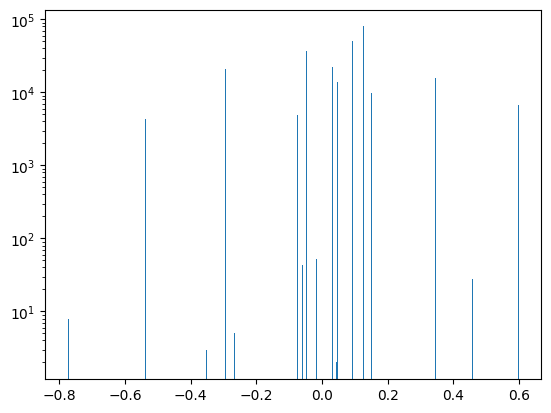

In [54]:
import matplotlib.pyplot as plt
plt.hist(10000 * (val_predictions - 1), bins=500)
plt.yscale('log')
plt.show()